In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
from tensorflow.keras.datasets import cifar10

In [115]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [59]:
x_train.shape

(50000, 32, 32, 3)

In [60]:
y_train.shape

(50000, 1)

In [61]:
x_test.shape

(10000, 32, 32, 3)

In [62]:
y_test.shape

(10000, 1)

In [63]:
x_train.max()

255

In [64]:
x_train.min()

0

In [65]:
x_test.max()

255

In [66]:
x_test.min()

0

In [67]:
x_train = x_train/255
x_test = x_test/255

In [68]:
x_train.max()

1.0

In [69]:
x_test.max()

1.0

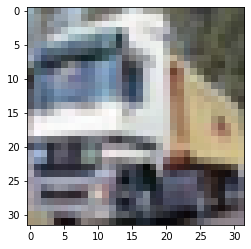

In [70]:
plt.imshow(x_train[1])

In [71]:
from tensorflow.keras.utils import to_categorical

In [72]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [75]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [92]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [94]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [97]:
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs=15, callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.5167 - accuracy: 0.4576 - val_loss: 1.3336 - val_accuracy: 0.5281
Epoch 2/15
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.1694 - accuracy: 0.5905 - val_loss: 1.1166 - val_accuracy: 0.6160
Epoch 3/15
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.0182 - accuracy: 0.6455 - val_loss: 1.0238 - val_accuracy: 0.6482
Epoch 4/15
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.9118 - accuracy: 0.6835 - val_loss: 1.0797 - val_accuracy: 0.6390
Epoch 5/15
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.8384 - accuracy: 0.7119 - val_loss: 1.0100 - val_accuracy: 0.6606
Epoch 6/15
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.7675 - accuracy: 0.7370 - val_loss: 1.0147 - val_accuracy: 0.6639
Epoch 7/15
50000/50000 [==============================] 

In [99]:
report = pd.DataFrame(model.history.history)

In [100]:
report.head()

,loss,accuracy,val_loss,val_accuracy
0,1.516668,0.45756,1.333596,0.5281
1,1.169368,0.59048,1.116592,0.6160
2,1.018199,0.64548,1.023758,0.6482
3,0.911757,0.68352,1.079702,0.6390
4,0.838423,0.71192,1.009972,0.6606


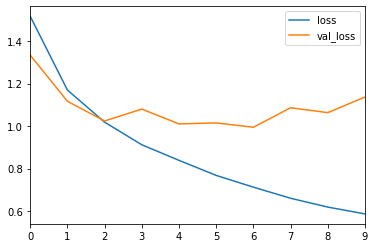

In [106]:
report[['loss', 'val_loss']].plot()

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
predictions = model.predict_classes(x_test)

In [152]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.31      0.90      0.46      1000
           1       0.56      0.81      0.66      1000
           2       0.56      0.32      0.41      1000
           3       0.33      0.34      0.34      1000
           4       0.75      0.08      0.14      1000
           5       0.50      0.41      0.45      1000
           6       0.79      0.36      0.50      1000
           7       0.51      0.68      0.58      1000
           8       0.63      0.40      0.49      1000
           9       0.77      0.50      0.61      1000

    accuracy                           0.48     10000
   macro avg       0.57      0.48      0.46     10000
weighted avg       0.57      0.48      0.46     10000



In [153]:
print(confusion_matrix(y_test, predictions))

[[901  30   5   7   2   1   4  26  19   5]
 [ 95 807   1  14   0   3   1   8  28  43]
 [330  41 317  68   2  97  19  99  17  10]
 [255  53  33 345   4 147  16 100  28  19]
 [313  64  87 124  78  70  43 192  20   9]
 [171  24  48 173   4 410   8 131  19  12]
 [114 105  51 209   4  40 364  38  60  15]
 [143  27  14  53   7  50   1 679   8  18]
 [466  70   6  21   1   5   0  15 399  17]
 [163 214   2  24   2   3   6  51  33 502]]


In [154]:
model.predict_classes(x_train[16].reshape(1, 32, 32, 3))

array([9])

In [155]:
y_train[16]

array([9], dtype=uint8)

In [156]:
model.metrics_names

['loss', 'accuracy']

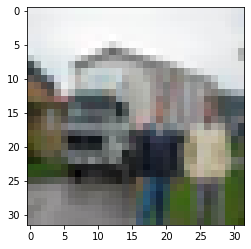

In [157]:
plt.imshow(x_train[16])

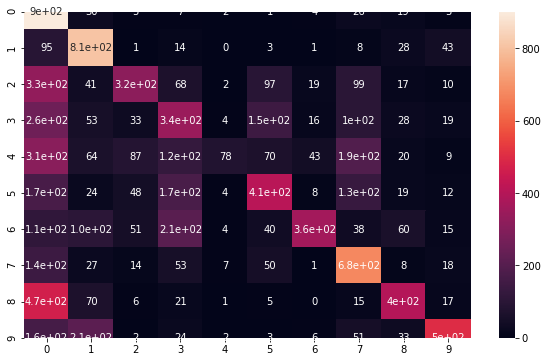

In [159]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)